## REGRESSION LOGISTIQUE
#### 1. Sélectionner les variables explicatives en utilisant l’algorithme Recursive feature elimination. 
ATTENTION : Cette méthode n’a pas encore été abordée en cours. Néanmoins, elle est simple à appliquer avec scikit-learn. Vous pouvez bien évidement choisir une autre méthode de sélection de variables explicatives.
#### 2. Elaborer un modèle de régression logistique pour prédire la variable alive en fonction des variables explicatives choisies.
#### 3. Conclure

---------------------------------------------------------------------------------------------------------------------

### Importer les librairies


In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importer la dataset et l'explorer

In [91]:
data = pd.read_csv('trainClean.csv', sep=',', encoding='utf-8')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


#### Simuler (Dummy) les catégorielles features de la dataset

   ##### Compter le nombre de  catégorielles features que nous avons dans l'ensemble de données

In [92]:
categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['Age_categories', 'Name', 'Sex', 'Embarked', 'Ticket']

**Nous allons supprimer les deux colonnes: Nom et Ticket (car elles ne contiennent pas d'informations utiles pour nous) et facturer et aprés supprimer le reste des colonnes **

In [93]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [94]:
data = create_dummies(data,"Sex")

In [95]:
data = create_dummies(data,"Age_categories")

In [96]:
data = create_dummies(data,"Embarked")

In [97]:
data=data.drop(['Name','Ticket','Sex','Sex_male','Age_categories','Embarked','PassengerId'], axis=1)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 17 columns):
Survived                      889 non-null int64
Pclass                        889 non-null int64
Age                           889 non-null float64
SibSp                         889 non-null int64
Parch                         889 non-null int64
Fare                          889 non-null float64
Sex_female                    889 non-null uint8
Age_categories_Adult          889 non-null uint8
Age_categories_Child          889 non-null uint8
Age_categories_Infant         889 non-null uint8
Age_categories_Missing        889 non-null uint8
Age_categories_Senior         889 non-null uint8
Age_categories_Teenager       889 non-null uint8
Age_categories_Young Adult    889 non-null uint8
Embarked_C                    889 non-null uint8
Embarked_Q                    889 non-null uint8
Embarked_S                    889 non-null uint8
dtypes: float64(2), int64(4), uint8(11)
memory usage: 51.3

### Création d'un train set et validation set

In [99]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=5)
#X.columns

In [100]:
print(X_train.shape,'\n')
print(X_valid.shape,'\n')
print(y_train.shape,'\n')
print(y_valid.shape,'\n')

(711, 16) 

(178, 16) 

(711,) 

(178,) 



### 1. Model de regression logistique en utilisant tout les features 

In [101]:
regLogistic=LogisticRegression(solver='newton-cg', multi_class='auto', penalty ='l2', random_state = None)

In [122]:
def logisticeModel(columNames):
    logReg_model = regLogistic.fit(X_train[columNames], y_train)
    #Test the model
    y_pred = logReg_model.predict(X_valid[columNames])
    
    print(classification_report(y_valid, y_pred))

    print(accuracy_score(y_valid, y_pred)) # le plus important pour le moment; précisément la première ligne

    print(confusion_matrix(y_valid, y_pred))

In [114]:
logisticeModel(X_train.columns.tolist())

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       119
           1       0.80      0.75      0.77        59

    accuracy                           0.85       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178

0.8539325842696629
[[108  11]
 [ 15  44]]


### 2.Model de regression logistique par sélectionner les variables explicatives en utilisant l’algorithme Recursive feature elimination (RFE). 

In [115]:
from sklearn.feature_selection import RFE
# utilise regression lineair comme model
# classer toutes les features, c.a.d poursuivre l'élimination jusqu'à la dernière
rfe=RFE(regLogistic,n_features_to_select=1)
names=X_train.columns.tolist()
rfe.fit(X_train,y_train)
print("Features triées par leurs rangs ")
print(sorted(zip(map(lambda x: round(x,4),rfe.ranking_),names)))

Features triées par leurs rangs 
[(1, 'Sex_female'), (2, 'Age_categories_Infant'), (3, 'Pclass'), (4, 'Age_categories_Senior'), (5, 'Age_categories_Adult'), (6, 'Embarked_S'), (7, 'Age_categories_Child'), (8, 'SibSp'), (9, 'Age_categories_Missing'), (10, 'Age_categories_Teenager'), (11, 'Parch'), (12, 'Embarked_C'), (13, 'Embarked_Q'), (14, 'Age_categories_Young Adult'), (15, 'Age'), (16, 'Fare')]


In [123]:
colNmae=['Sex_female','Age_categories_Infant','Pclass','Age_categories_Senior']
logisticeModel(colNmae)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       119
           1       0.78      0.76      0.77        59

    accuracy                           0.85       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178

0.848314606741573
[[106  13]
 [ 14  45]]


### 3. Model regression logistique par sélectionner les variables explicatives en utilisant l’algorithme Recursive feature elimination avec cross-validation (RFECV). 

In [133]:
rfecv = RFECV(estimator=regLogistic, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Age_categories_Adult',
       'Age_categories_Child', 'Age_categories_Infant',
       'Age_categories_Missing', 'Age_categories_Senior',
       'Age_categories_Teenager', 'Age_categories_Young Adult', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [126]:
rfecv.grid_scores_

array([0.77216586, 0.77358416, 0.78060672, 0.76794051, 0.78202502,
       0.78625037, 0.78624052, 0.78483207, 0.79326307, 0.79046587,
       0.79328277, 0.79328277, 0.80309268, 0.80450113, 0.80173348,
       0.80030533])

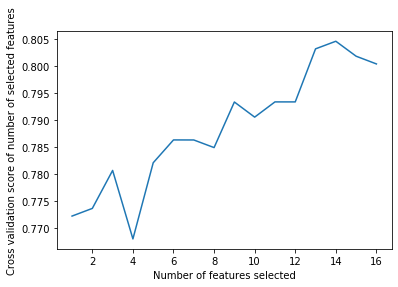

In [127]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [128]:
x_train_rfecv = rfecv.transform(X_train)
x_valid_rfecv = rfecv.transform(X_valid)

In [129]:
logReg_rfecv_model = regLogistic.fit(x_train_rfecv, y_train)

In [130]:
#Test the model
y_pred = logReg_rfecv_model.predict(x_valid_rfecv)

##### Évaluation du modèle

In [132]:

print(classification_report(y_valid, y_pred))

print(accuracy_score(y_valid, y_pred)) # le plus important pour le moment; précisément la première ligne

print(confusion_matrix(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       119
           1       0.78      0.78      0.78        59

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178

0.8539325842696629
[[106  13]
 [ 13  46]]
